In [1]:
import numpy as np
import pandas as pd

In [2]:
bdata = pd.read_csv(r"C:\Users\Om\OneDrive\Documents\Labs\MLEL\books.csv")

In [3]:
bdata

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
...,...,...,...,...,...
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction
348,Wonder,R. J. Palacio,4.8,2013,Fiction


In [4]:
bdata.columns

Index(['name', 'author', 'rating', 'year', 'genre'], dtype='object')

In [5]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [6]:
genre1 = ['Non Fiction', 'Fiction']
bdata = bdata[bdata['genre'].isin(genre1)]
bdata

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction
...,...,...,...,...,...
344,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,2018,Non Fiction
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction


In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frquency vs Rating')

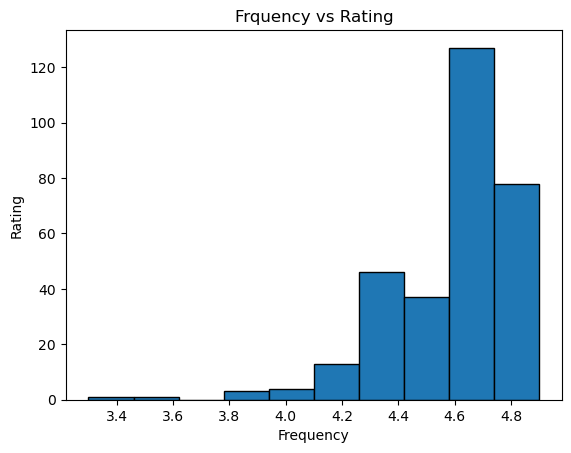

In [8]:
plt.hist(bdata['rating'],edgecolor = "black")
plt.xlabel('Frequency')
plt.ylabel('Rating')
plt.title('Frquency vs Rating')

In [85]:
bdata1 = bdata.groupby(['year', 'genre'])
rating_avg = bdata1['rating'].mean()
rating_avg

year  genre      
2009  Fiction        4.561905
      Non Fiction    4.576923
2010  Fiction        4.580000
      Non Fiction    4.539130
2011  Fiction        4.569231
      Non Fiction    4.493750
2012  Fiction        4.353846
      Non Fiction    4.533333
2013  Fiction        4.562500
      Non Fiction    4.607143
2014  Fiction        4.650000
      Non Fiction    4.630000
2015  Fiction        4.320000
      Non Fiction    4.670000
2016  Fiction        4.650000
      Non Fiction    4.687500
2017  Fiction        4.676923
      Non Fiction    4.591667
2018  Fiction        4.585714
      Non Fiction    4.605882
2019  Fiction        4.733333
      Non Fiction    4.676923
Name: rating, dtype: float64

In [86]:
rating_avg.xs('Fiction', level='genre')#fiction data

year
2009    4.561905
2010    4.580000
2011    4.569231
2012    4.353846
2013    4.562500
2014    4.650000
2015    4.320000
2016    4.650000
2017    4.676923
2018    4.585714
2019    4.733333
Name: rating, dtype: float64

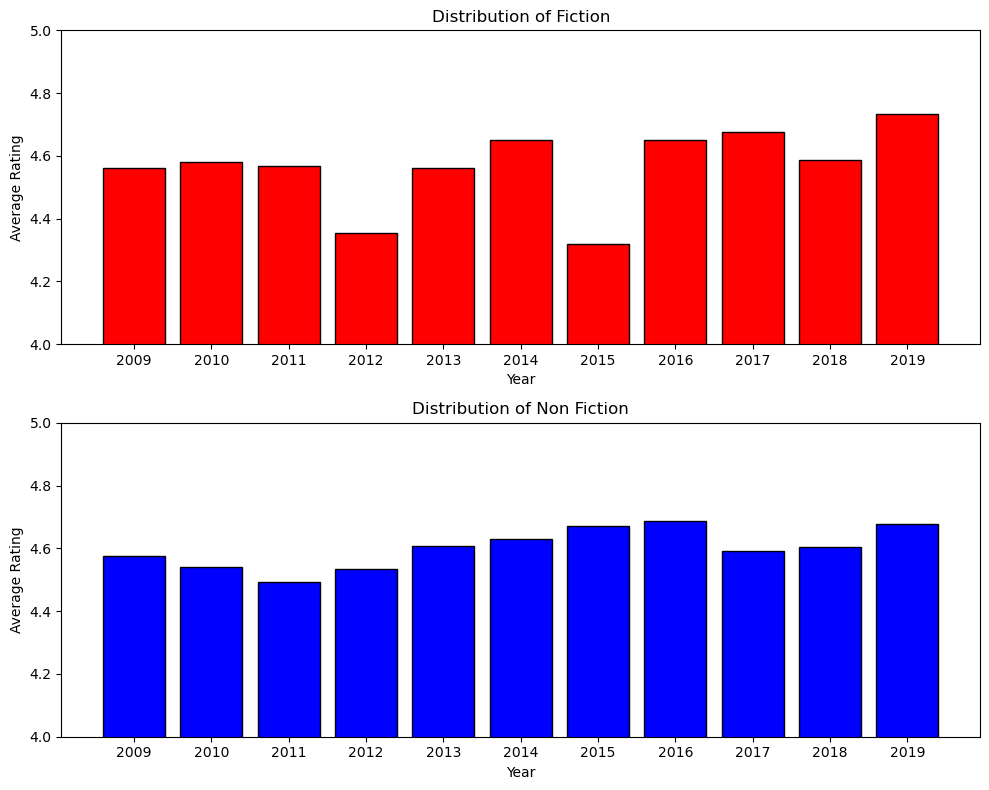

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes = axes.flatten()

Genres = ['Fiction', 'Non Fiction']

for i, genre in enumerate(Genres):
    genre_data = rating_avg.xs(genre, level='genre')
    axes[i].bar(genre_data.index.get_level_values('year'), genre_data.values, color=colors[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {genre}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Rating')
    axes[i].set_ylim(4,5)
    axes[i].set_xticks(genre_data.index.get_level_values('year')) 
plt.tight_layout()

In [89]:
release = bdata1.describe()
release

rating                                                  
                  count      mean       std  min    25%   50%    75%  max
year genre                                                               
2009 Fiction       21.0  4.561905  0.224669  4.0  4.400  4.60  4.700  4.8
     Non Fiction   26.0  4.576923  0.183973  4.0  4.500  4.60  4.700  4.8
2010 Fiction       15.0  4.580000  0.200713  4.1  4.550  4.60  4.700  4.8
     Non Fiction   23.0  4.539130  0.161637  4.2  4.400  4.60  4.700  4.8
2011 Fiction       13.0  4.569231  0.197419  4.2  4.400  4.60  4.700  4.8
     Non Fiction   16.0  4.493750  0.217466  4.1  4.300  4.55  4.625  4.9
2012 Fiction       13.0  4.353846  0.427425  3.3  4.300  4.50  4.600  4.8
     Non Fiction   12.0  4.533333  0.182574  4.2  4.400  4.60  4.600  4.8
2013 Fiction       16.0  4.562500  0.342296  3.9  4.450  4.65  4.800  4.9
     Non Fiction   14.0  4.607143  0.197929  4.1  4.500  4.65  4.775  4.8
2014 Fiction       14.0  4.650000  0.169842  4.3  4.525  4.65  4.775  4.9
     Non Fiction   10.0  4.630000  0.094868  4.5  4.600  4.60  4.700  4.8
2015 Fiction        5.0  4.320000  0.486826  3.6  4.100  4.40  4.700  4.8
     Non Fiction   20.0  4.670000  0.126074  4.4  4.600  4.70  4.800  4.9
2016 Fiction        8.0  4.650000  0.287849  4.0  4.600  4.70  4.825  4.9
     Non Fiction   16.0  4.687500  0.166833  4.3  4.675  4.70  4.800  4.9
2017 Fiction       13.0  4.676923  0.196443  4.3  4.600  4.80  4.800  4.9
     Non Fiction   12.0  4.591667  0.156428  4.3  4.500  4.60  4.700  4.9
2018 Fiction        7.0  4.585714  0.247848  4.3  4.400  4.50  4.800  4.9
     Non Fiction   17.0  4.605882  0.201465  4.2  4.400  4.70  4.800  4.8
2019 Fiction        6.0  4.733333  0.186190  4.5  4.575  4.80  4.875  4.9
     Non Fiction   13.0  4.676923  0.173944  4.3  4.600  4.70  4.800  4.9

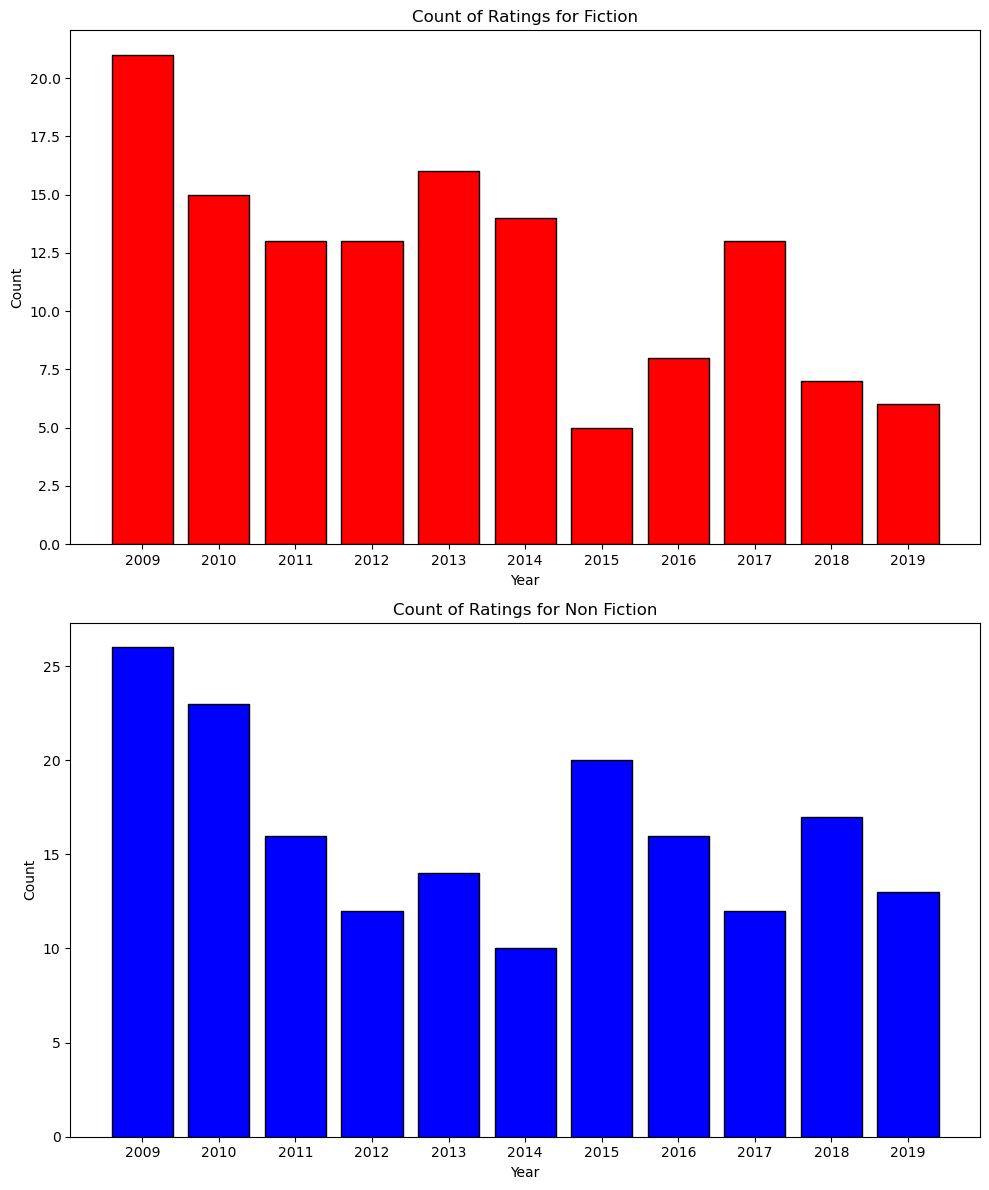

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
axes = axes.flatten()

Genres = ['Fiction', 'Non Fiction']
colors = ['red', 'blue']

for i, genre in enumerate(Genres):
    count_data = release.xs(genre, level='genre')['rating']['count']
    axes[i].bar(count_data.index.get_level_values('year'), count_data.values, color=colors[i], edgecolor='black')
    axes[i].set_title(f'Count of Ratings for {genre}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(genre_data.index.get_level_values('year')) 
plt.tight_layout()

In [51]:
#Number of books released of non-fiction and fiction
#Comparison of ratings according to genre
#books released by same author and check if the rating is improving to increasing year